### Name: Harsh Arora
### Roll No.: AE-1218
### Data Mining-II Assignment 3



##### 1 .Apply clustering algorithm on the selected dataset. For each clusters compute : the mean and Ʃ the co-variance matrix. Use Mahalanobis Distance to compute distance of each point in the cluster from the mean. Report top 5% points as anomalies as given below:
##### a) Use distance to compute anomaly score
##### b) Distance-based anomaly score (on the basis of kth neighbour)
##### c) Density-based anomaly score
##### d) Relative density-based anomaly score
##### Display points which are reported outliers in atleast 3 of the above cases

In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv
import matplotlib.pyplot as plt

In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
X


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [52]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Initialize dataframe to store cluster-wise results
clusters_df = pd.DataFrame(X)
clusters_df['Cluster'] = labels

# Step 2: Compute mean and covariance matrix for each cluster
def compute_mean_cov(cluster_points):
    mean = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points.T)
    return mean, cov

mean_cov_dict = {}
for cluster_label in np.unique(labels):
    cluster_points = clusters_df[clusters_df['Cluster'] == cluster_label].iloc[:, :-1].values
    mean, cov = compute_mean_cov(cluster_points)
    mean_cov_dict[cluster_label] = {'mean': mean, 'cov': cov}


    # Print the mean and sum of the covariance matrix for each cluster
    print(f"Cluster {cluster_label}:")
    print(f"Mean: {mean}")
    print(f"Sum of Covariance Matrix: {np.sum(cov)}\n")

Cluster 0:
Mean: [1.51813399e+00 1.32832515e+01 3.44834356e+00 1.32950920e+00
 7.25799387e+01 5.08404908e-01 8.61159509e+00 4.27607362e-02
 6.32515337e-02]
Sum of Covariance Matrix: 0.017228797069113094

Cluster 1:
Mean: [ 1.52437625 12.47125     0.308125    1.369375   72.344375    0.304375
 12.7975      0.196875    0.0825    ]
Sum of Covariance Matrix: 0.007627518425000722

Cluster 2:
Mean: [1.51669543e+00 1.44162857e+01 2.13714286e-01 2.01685714e+00
 7.31217143e+01 5.32285714e-01 8.80971429e+00 7.81142857e-01
 1.62857143e-02]
Sum of Covariance Matrix: 0.00752604246671858



C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
# Step 3: Compute Mahalanobis Distance and report top 5% points as anomalies
def mahalanobis_distance(x, mean, cov_inv):
    return mahalanobis(x, mean, cov_inv)

mahalanobis_distances = []
for i, row in clusters_df.iterrows():
    cluster = row['Cluster']
    mean = mean_cov_dict[cluster]['mean']
    cov_inv = inv(mean_cov_dict[cluster]['cov'])
    dist = mahalanobis_distance(row[:-1], mean, cov_inv)
    mahalanobis_distances.append(dist)

clusters_df['Mahalanobis_Distance'] = mahalanobis_distances
threshold = np.percentile(mahalanobis_distances, 95)
clusters_df['Mahalanobis_Anomaly'] = clusters_df['Mahalanobis_Distance'] > threshold

print("\nMahalanobis Outliers:")
print(clusters_df[clusters_df['Mahalanobis_Anomaly']])


Mahalanobis Outliers:
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Cluster  \
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10        0   
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31        0   
70   1.51574  14.86  3.67  1.74  71.87  0.16   7.36  0.00  0.12        0   
84   1.51409  14.25  3.09  2.08  72.28  1.10   7.08  0.00  0.00        0   
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00        0   
149  1.51643  12.16  3.52  1.35  72.89  0.57   8.53  0.00  0.00        0   
163  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00        0   
174  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51        0   
185  1.51131  13.69  3.20  1.81  72.81  1.76   5.43  1.19  0.00        0   
186  1.51838  14.32  3.26  2.22  71.25  1.46   5.79  1.63  0.00        0   
188  1.52247  14.86  2.20  2.06  70.26  0.76   9.76  0.00  0.00        0   

     Mahalanobis_Distance  Mahalanobis_Anomaly  
47             

In [54]:
# Step 4: Distance-based anomaly score (on the basis of k-th neighbor)
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)
distance_based_scores = distances[:, -1]
clusters_df['Distance_Anomaly'] = distance_based_scores > np.percentile(distance_based_scores, 95)

print("\nDistance-based Outliers:")
print(clusters_df[clusters_df['Distance_Anomaly']])


Distance-based Outliers:
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Cluster  \
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28        1   
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24        1   
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00        1   
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00        1   
163  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00        0   
171  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00        2   
172  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00        2   
184  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00        2   
185  1.51131  13.69  3.20  1.81  72.81  1.76   5.43  1.19  0.00        0   
189  1.52365  15.79  1.83  1.31  70.43  0.31   8.61  1.68  0.00        2   
201  1.51653  11.95  0.00  1.19  75.18  2.70   8.93  0.00  0.00        2   

     Mahalanobis_Distance  Mahalanobis_Anomaly  Distance_Anom

In [55]:
# Step 5: Density-based anomaly score using Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  
lof_scores = -lof.fit_predict(X) 

lof_threshold = np.percentile(lof_scores, 95)
clusters_df['LOF_Anomaly_Score'] = lof_scores  
clusters_df['LOF_Anomaly'] = lof_scores > lof_threshold 

# Display top 5% outliers
lof_outliers = clusters_df[clusters_df['LOF_Anomaly']]
print("\nTop 5% LOF Outliers:")
print(lof_outliers)



Top 5% LOF Outliers:
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Cluster  \
70   1.51574  14.86  3.67  1.74  71.87  0.16  7.36  0.00  0.12        0   
84   1.51409  14.25  3.09  2.08  72.28  1.10  7.08  0.00  0.00        0   
163  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00        0   
171  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.00        2   
172  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.00        2   
180  1.51299  14.40  1.74  1.54  74.55  0.00  7.59  0.00  0.00        2   
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00        2   
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00        0   
186  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00        0   
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00        2   
201  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00        2   

     Mahalanobis_Distance  Mahalanobis_Anomaly  Distance_Anomaly  \
70       

In [56]:
# Step 6: Relative density-based anomaly score using LOF (just scale LOF scores)
clusters_df['Relative_Density_Score'] = lof.negative_outlier_factor_
relative_density_threshold = np.percentile(clusters_df['Relative_Density_Score'], 5)
clusters_df['Relative_Density_Anomaly'] = clusters_df['Relative_Density_Score'] < relative_density_threshold

print("\nRelative Density-based Outliers:")
print(clusters_df[clusters_df['Relative_Density_Anomaly']])


Relative Density-based Outliers:
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Cluster  \
70   1.51574  14.86  3.67  1.74  71.87  0.16  7.36  0.00  0.12        0   
84   1.51409  14.25  3.09  2.08  72.28  1.10  7.08  0.00  0.00        0   
163  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00        0   
171  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.00        2   
172  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.00        2   
180  1.51299  14.40  1.74  1.54  74.55  0.00  7.59  0.00  0.00        2   
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00        2   
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00        0   
186  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00        0   
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00        2   
201  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00        2   

     Mahalanobis_Distance  Mahalanobis_Anomaly  Distance_Anomaly 

In [57]:
# Step 7: Display points which are reported as outliers in at least 3 of the above cases
clusters_df['Anomaly_Count'] = clusters_df[['Mahalanobis_Anomaly', 'Distance_Anomaly', 'LOF_Anomaly', 'Relative_Density_Anomaly']].sum(axis=1)
final_anomalies = clusters_df[clusters_df['Anomaly_Count'] >= 3]

print(final_anomalies)

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Cluster  \
70   1.51574  14.86  3.67  1.74  71.87  0.16  7.36  0.00  0.12        0   
84   1.51409  14.25  3.09  2.08  72.28  1.10  7.08  0.00  0.00        0   
163  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00        0   
171  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.00        2   
172  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.00        2   
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00        2   
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00        0   
186  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00        0   
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00        2   
201  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00        2   

     Mahalanobis_Distance  Mahalanobis_Anomaly  Distance_Anomaly  \
70               5.445187                 True             False   
84               5.114234             

### Ques 2 .Compare the module provided below to detect Top 2% outliers in any selected dataset 

In [58]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X) 
X_scores = -clf.negative_outlier_factor_  

# Set a threshold to flag the top 2% as anomalies
threshold = np.percentile(X_scores, 98)
anomalies = X[X_scores > threshold]  

print("Top 2% anomalies based on LOF scores:")
print(anomalies)


Top 2% anomalies based on LOF scores:
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
163  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.0
171  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.0
172  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.0
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.0
186  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.0


In [63]:
# Convert the detected anomalies to DataFrame for easier comparison
lof_anomalies_df = pd.DataFrame(anomalies)

# Identify common anomalies between final_anomalies and LOF anomalies
# Assuming clusters_df has coordinates in the same order as X
common_anomalies = pd.merge(final_anomalies, lof_anomalies_df, how='inner')

print("Common anomalies reported by at least 3 methods and LOF:")
print(common_anomalies)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

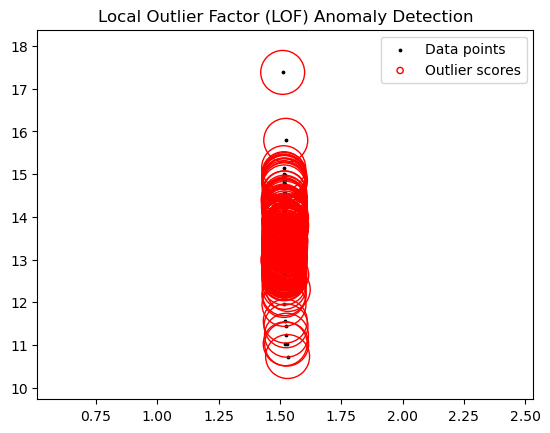

In [61]:
# Function to update legend marker size
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

# Step 3: Plot data points and outlier scores
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
scatter = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier scores")

# Plot settings
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()
